In [1]:
# Importing the required Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from IPython.display import display,clear_output

In [2]:
# Importing the Train Data

dataset= pd.read_csv("train_v9rqX0R.csv")
dataset.shape

(8523, 12)

In [3]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [6]:
dataset["Item_Fat_Content"]=dataset["Item_Fat_Content"].map({"Low Fat":"Low Fat","Regular":"Regular","low fat":"Low Fat","LF":"Low Fat","reg":"Regular"})

In [7]:
dataset["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [8]:
dataset["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
dataset["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [10]:
# Converting the datatypes

dataset["Item_Fat_Content"]=dataset["Item_Fat_Content"].astype("category")
dataset["Item_Type"]=dataset["Item_Type"].astype("category")
dataset["Outlet_Identifier"]=dataset["Outlet_Identifier"].astype("category")
dataset["Outlet_Establishment_Year"]=pd.to_datetime(dataset["Outlet_Establishment_Year"],format="%Y")
dataset["Outlet_Size"]=dataset["Outlet_Size"].astype("category")
dataset["Outlet_Location_Type"]=dataset["Outlet_Location_Type"].astype("category")
dataset["Outlet_Type"]=dataset["Outlet_Type"].astype("category")
display(dataset.head())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052


In [11]:
dataset.dtypes

Item_Identifier                      object
Item_Weight                         float64
Item_Fat_Content                   category
Item_Visibility                     float64
Item_Type                          category
Item_MRP                            float64
Outlet_Identifier                  category
Outlet_Establishment_Year    datetime64[ns]
Outlet_Size                        category
Outlet_Location_Type               category
Outlet_Type                        category
Item_Outlet_Sales                   float64
dtype: object

In [12]:
# items=dataset[["Item_Identifier","Item_Weight","Item_Fat_Content","Item_Visibility","Item_Type","Item_MRP"]]

# outlets=dataset[['Outlet_Identifier','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]

In [13]:
dataset.shape

(8523, 12)

In [14]:
dataset.isnull().sum()/dataset.shape[0]

Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [15]:
dataset.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
dataset_item_weight=dataset[~dataset.Item_Weight.isnull()][["Item_Identifier","Item_Weight"]].groupby("Item_Identifier")["Item_Weight"].unique()
dataset_item_weight=pd.DataFrame(dataset_item_weight).reset_index()
dataset_item_weight.iloc[350:355,:]

,Item_Identifier,Item_Weight
350,FDE51,[5.925]
351,FDE53,[10.895]
352,FDE56,[17.25]
353,FDE57,[9.6]
354,FDE58,[18.5]


In [17]:
weight_dict={}

for i,j in zip(dataset_item_weight.Item_Identifier,dataset_item_weight.Item_Weight):
    a=list(j)
    
    if(len(a)==0):
        weight_dict.update({i:np.nan})
    else:
        weight_dict.update({i:a[0]})
    

weight_dict

{'DRA12': 11.6,
 'DRA24': 19.35,
 'DRA59': 8.27,
 'DRB01': 7.39,
 'DRB13': 6.115,
 'DRB24': 8.785,
 'DRB25': 12.3,
 'DRB48': 16.75,
 'DRC01': 5.92,
 'DRC12': 17.85,
 'DRC13': 8.26,
 'DRC24': 17.85,
 'DRC25': 5.73,
 'DRC27': 13.8,
 'DRC36': 13.0,
 'DRC49': 8.67,
 'DRD01': 12.1,
 'DRD12': 6.96,
 'DRD13': 15.0,
 'DRD15': 10.6,
 'DRD24': 13.85,
 'DRD25': 6.135,
 'DRD27': 18.75,
 'DRD37': 9.8,
 'DRD49': 9.895,
 'DRD60': 15.7,
 'DRE01': 10.1,
 'DRE03': 19.6,
 'DRE12': 4.59,
 'DRE13': 6.28,
 'DRE15': 13.35,
 'DRE25': 15.35,
 'DRE27': 11.85,
 'DRE37': 13.5,
 'DRE48': 8.43,
 'DRE49': 20.75,
 'DRE60': 9.395,
 'DRF01': 5.655,
 'DRF03': 19.1,
 'DRF13': 12.1,
 'DRF15': 18.35,
 'DRF23': 4.61,
 'DRF25': 9.0,
 'DRF27': 8.93,
 'DRF36': 16.1,
 'DRF37': 17.25,
 'DRF48': 5.73,
 'DRF49': 7.27,
 'DRF51': 15.75,
 'DRF60': 10.8,
 'DRG01': 14.8,
 'DRG03': 14.5,
 'DRG11': 6.385,
 'DRG13': 17.25,
 'DRG15': 6.13,
 'DRG23': 8.88,
 'DRG25': 10.5,
 'DRG27': 8.895,
 'DRG36': 14.15,
 'DRG37': 16.2,
 'DRG39': 14.15,
 '

In [18]:
for a,b in weight_dict.items():
    
    for i,j in zip(dataset[dataset.Item_Identifier==a].index,dataset[dataset.Item_Identifier==a]):
        dataset.loc[i,"Item_Weight"]=b


We have successfully managed to fill the missing values for Item_Weight

In [19]:
dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
dataset.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002-01-01,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004-01-01,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,1845.5976


There are no duplicates in our dataset

In [21]:
dataset[dataset["Outlet_Size"].isnull()]["Outlet_Identifier"].unique()

[OUT010, OUT045, OUT017]
Categories (3, object): [OUT010, OUT045, OUT017]

In [22]:
display(dataset[dataset.Outlet_Identifier=="OUT010"]["Outlet_Size"].isnull())
print(dataset[dataset.Outlet_Identifier=="OUT010"]["Outlet_Size"].isnull().sum())

3       True
28      True
30      True
45      True
65      True
        ... 
8400    True
8432    True
8473    True
8486    True
8509    True
Name: Outlet_Size, Length: 555, dtype: bool

555


In [23]:
display(dataset[dataset.Outlet_Identifier=="OUT045"]["Outlet_Size"].isnull())
print(dataset[dataset.Outlet_Identifier=="OUT045"]["Outlet_Size"].isnull().sum())

8       True
33      True
46      True
47      True
56      True
        ... 
8483    True
8502    True
8508    True
8514    True
8519    True
Name: Outlet_Size, Length: 929, dtype: bool

929


In [24]:
display(dataset[dataset.Outlet_Identifier=="OUT017"]["Outlet_Size"].isnull())
print(dataset[dataset.Outlet_Identifier=="OUT017"]["Outlet_Size"].isnull().sum())

9       True
25      True
53      True
54      True
73      True
        ... 
8493    True
8494    True
8496    True
8500    True
8501    True
Name: Outlet_Size, Length: 926, dtype: bool

926


There are three Outlets whose Size is not Available to us

In [25]:
dataset.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [26]:
items_dataset=dataset[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP']]
outlet_dataset=dataset[['Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

## Examining each of the Variables

### ITEMS

In [27]:
items_dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614


In [28]:
items_dataset.loc[:,"Item_Group"]=list(map(lambda x: x[:3],items_dataset.Item_Identifier))
items_dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Item_Group
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,FDA
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,DRC
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,FDN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,FDX
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,NCD


### Item_Identifier

In [29]:
items_dataset["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
FDD38     9
FDQ40     9
NCY18     9
         ..
FDE52     1
FDO33     1
FDC23     1
DRF48     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

**We have 1559 Unique Item_Identifiers** 

### Item_Fat_Content

In [30]:
items_dataset["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: category
Categories (2, object): [Low Fat, Regular]

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

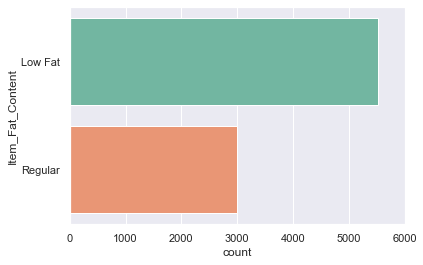

In [40]:
sns.set(palette="Set2")
sns.countplot(y="Item_Fat_Content",data=items_dataset,)
plt.xlim(0,6000)

display(items_dataset.Item_Fat_Content.value_counts(normalize=True))

plt.show()

**65% of the Items are of Low Fat whereas 35% are Regular**

In [31]:
items_dataset.groupby("Item_Identifier").mean()

,Item_Weight,Item_Visibility,Item_MRP
Item_Identifier,,,
DRA12,11.600,0.031956,141.865400
DRA24,19.350,0.048062,164.086800
DRA59,8.270,0.134718,185.179900
DRB01,7.390,0.082126,189.586333
DRB13,6.115,0.008002,189.693000
...,...,...,...
NCZ30,6.590,0.024956,120.752657
NCZ41,19.850,0.051623,125.630400
NCZ42,10.500,0.009044,236.644800
